# 📈 Simple Market Price Forecasting

This notebook demonstrates how to build a basic machine learning model to forecast the **next day's closing price** of a financial asset — using historical data such as stock or cryptocurrency prices.

### What’s Included:
- Example: Forecasting **Apple (AAPL)** stock using historical closing prices
- Quick intro to **data preprocessing** and handling missing values
- Model training with **Random Forest Regressor**
- Forecasting the next closing price
- How to load different datasets: **crypto**, **forex**, or any CSV with a `Close` column

> This is a lightweight, practical forecasting demo — ideal for showcasing a baseline predictive model or extending into more advanced financial modeling.


In [2]:
!pip install yfinance


In [3]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = "AAPL"  # Example: Apple Inc.

# Fetch historical market data for the last 1 year
data = yf.download(ticker_symbol, period="1y", interval="1d")

# Display the first few rows
data.head()

# Save the data to a CSV file
data.to_csv('/content/AAPL_stock_data.csv')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
from google.colab import files
files.download('/content/AAPL_stock_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Option 2: Get Market Data Using cryptocompare (For Cryptocurrency Data)

In [5]:
!pip install cryptocompare


  Preparing metadata (setup.py) ... done
  Created wheel for cryptocompare: filename=cryptocompare-0.7.6-py3-none-any.whl size=6291 sha256=61f354a75d9bc4873ff0998ff946b0c0acd4cdca370e191f1f8818454976880a
  Stored in directory: /root/.cache/pip/wheels/ac/d9/d3/45937831310f976e534a0a1dd2566a04e9d17ecd42a6932f31
Successfully built cryptocompare


###Option 3: Fetch Data Using Alpha Vantage (For Stock & Forex Data)
Alpha Vantage provides free APIs for both stock and forex data.

Install the alpha_vantage package:

In [8]:
!pip install alpha_vantage


Saving AAPL_stock_data.csv to AAPL_stock_data (1).csv
MSE: 60.46701566063864
Predicted next close price: 211.17


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


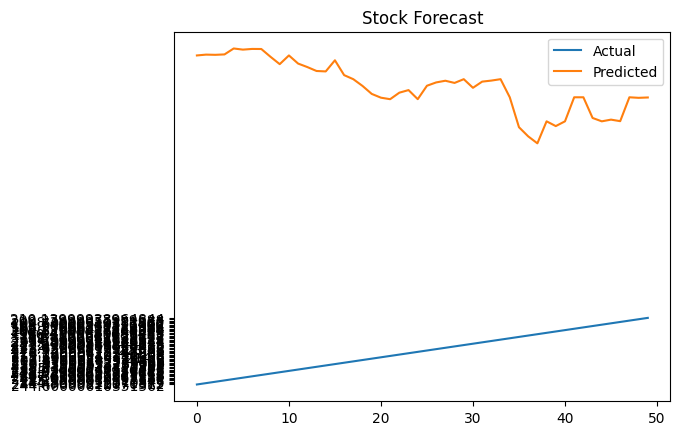

In [35]:
# Step 1: Imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Load data (upload CSV with 'Close' column)
from google.colab import files
uploaded = files.upload()

data = pd.read_csv(next(iter(uploaded)))
data['Target'] = data['Close'].shift(-1)  # Predict next day's Close
data.dropna(inplace=True)

# Step 3: Prepare features (just previous close)
X = data[['Close']]
y = data['Target']

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Step 5: Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 6: Evaluate
preds = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, preds))

# Step 7: Forecast next close
next_close = model.predict([[X.iloc[-1].values[0]]])
print("Predicted next close price:", round(next_close[0], 2))

# Optional: Plot
plt.plot(y_test.values, label='Actual')
plt.plot(preds, label='Predicted')
plt.legend()
plt.title("Stock Forecast")
plt.show()


In [36]:
#using only 'Close' as feature
last_close = data[['Close']].iloc[-1].values.reshape(1, -1)


In [37]:
last_features = data[['Open', 'High', 'Low', 'Close', 'Volume']].iloc[-1].values.reshape(1, -1)


In [38]:
next_day_prediction = model.predict(last_close)  # or model.predict(last_features)
print("Predicted next day's close price:", round(next_day_prediction[0], 2))


Predicted next day's close price: 211.17


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
